In [4]:
# Reads in dataset and display shape/features, makes small edits to dataframe to improve format

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

odf = pd.read_csv('SnP_daily_update.csv', header=None)


odf.iloc[2:, 1:] = odf.iloc[2:, 1:].apply(pd.to_numeric, errors='ignore')  # Ensure proper numeric conversion

# Round only rows from index 2 downward and columns from index 1 onward
odf.iloc[3:, 1:] = odf.iloc[3:, 1:].round(2)

def remove_trailing_zeros(x):
    if isinstance(x, float):
        # Check if the value is a whole number and remove the `.00`
        if x.is_integer():
            return int(x)  # Convert to int if it's a whole number
    return x  # Return original value if not a float or not an integer

# Apply the function to the relevant columns (2506 onwards)
odf.iloc[:, 2506:] = odf.iloc[:, 2506:].applymap(remove_trailing_zeros)
# Ensure display formatting applies to rounded values
pd.options.display.float_format = '{:.2f}'.format

print("Original DataFrame:")
display(odf.head())
print(f"Dataset Shape: {odf.shape}")
print(f"Number of rows (trading days): {odf.shape[0]}")
print(f"Number of columns (features): {odf.shape[1]}")
display(odf.tail())

df_first = odf.iloc[:2].copy()
df_second = odf.iloc[3:].copy()
df_first.iloc[0, 0] = 'Date/Vars'

# display(df_first.head())
# display(df_second.head())

combined_df = pd.concat([df_first, df_second], axis=0)
row1 = combined_df.iloc[0].copy()  
row2 = combined_df.iloc[1].copy() 
combined_df.iloc[0] = row2
combined_df.iloc[1] = row1
df = combined_df
df.reset_index(drop=True, inplace=True)

print("Updated DataFrame:") #improves format
display(df.head())
print(f"Dataset Shape: {df.shape}")
print(f"Number of rows (trading days): {df.shape[0]}")
print(f"Number of columns (features): {df.shape[1]}")

Original DataFrame:


,0,1,2,3,4,5,6,7,8,9,...,2506,2507,2508,2509,2510,2511,2512,2513,2514,2515
0,Price,Close,Close,Close,Close,Close,Close,Close,Close,Close,...,Volume,Volume,Volume,Volume,Volume,Volume,Volume,Volume,Volume,Volume
1,Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
2,Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-01-04,20.02,6.44,NaN,NaN,18.67,7.60,31.94,37.09,22.26,...,348017,1832400,4741400,2670400,27809100,NaN,2962274,805872,168800,NaN
4,2010-01-05,19.80,6.45,NaN,NaN,18.51,7.58,32.14,37.70,22.22,...,339523,1724500,5644300,4321400,30174700,NaN,3298757,1769643,168800,NaN


Dataset Shape: (3804, 2516)
Number of rows (trading days): 3804
Number of columns (features): 2516


,0,1,2,3,4,5,6,7,8,9,...,2506,2507,2508,2509,2510,2511,2512,2513,2514,2515
3799,2025-02-05,147.99,232.21,191.75,129.60,132.06,93.06,398.25,437.63,209.80,...,942700,2721000,3796500,2939800,13364400,1970500,2177600,1531100,408800,2084900
3800,2025-02-06,147.64,232.96,192.97,132.57,128.22,93.88,387.34,435.40,207.83,...,641900,2109400,2458500,5611500,13411400,1748600,5571800,3791900,579200,2419500
3801,2025-02-07,145.21,227.38,190.60,134.98,129.07,93.50,385.98,433.07,205.21,...,466300,2037200,2255300,3797800,10051600,2040200,2694300,2803600,1423700,1927100
3802,2025-02-10,143.69,227.65,190.34,135.24,131.31,91.46,386.89,451.10,204.86,...,451400,2590000,2620400,2638300,12142200,1490400,3733500,2528700,859700,2936100
3803,2025-02-11,141.75,232.62,191.83,134.52,131.44,89.60,390.01,458.82,203.46,...,667900,3662800,2133100,2284300,12710500,1211900,2541800,2101800,951100,2309400


Updated DataFrame:


,0,1,2,3,4,5,6,7,8,9,...,2506,2507,2508,2509,2510,2511,2512,2513,2514,2515
0,Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
1,Date/Vars,Close,Close,Close,Close,Close,Close,Close,Close,Close,...,Volume,Volume,Volume,Volume,Volume,Volume,Volume,Volume,Volume,Volume
2,2010-01-04,20.02,6.44,NaN,NaN,18.67,7.60,31.94,37.09,22.26,...,348017,1832400,4741400,2670400,27809100,NaN,2962274,805872,168800,NaN
3,2010-01-05,19.80,6.45,NaN,NaN,18.51,7.58,32.14,37.70,22.22,...,339523,1724500,5644300,4321400,30174700,NaN,3298757,1769643,168800,NaN
4,2010-01-06,19.73,6.35,NaN,NaN,18.62,7.54,32.48,37.62,22.18,...,585049,2254400,2738800,2164500,35044700,NaN,4178981,1315619,385300,NaN


Dataset Shape: (3803, 2516)
Number of rows (trading days): 3803
Number of columns (features): 2516


Missing values per column in the first 20 columns:
+--------------+--------+--------------------------+
| Column Index | Ticker | Number of Missing Values |
+--------------+--------+--------------------------+
|      1       |   A    |            0             |
|      2       |  AAPL  |            0             |
|      3       |  ABBV  |           754            |
|      4       |  ABNB  |           2754           |
|      5       |  ABT   |            0             |
|      6       |  ACGL  |            0             |
|      7       |  ACN   |            0             |
|      8       |  ADBE  |            0             |
|      9       |  ADI   |            0             |
|      10      |  ADM   |            0             |
|      11      |  ADP   |            0             |
|      12      |  ADSK  |            0             |
|      13      |  AEE   |            0             |
|      14      |  AEP   |            0             |
|      15      |  AES   |            0          

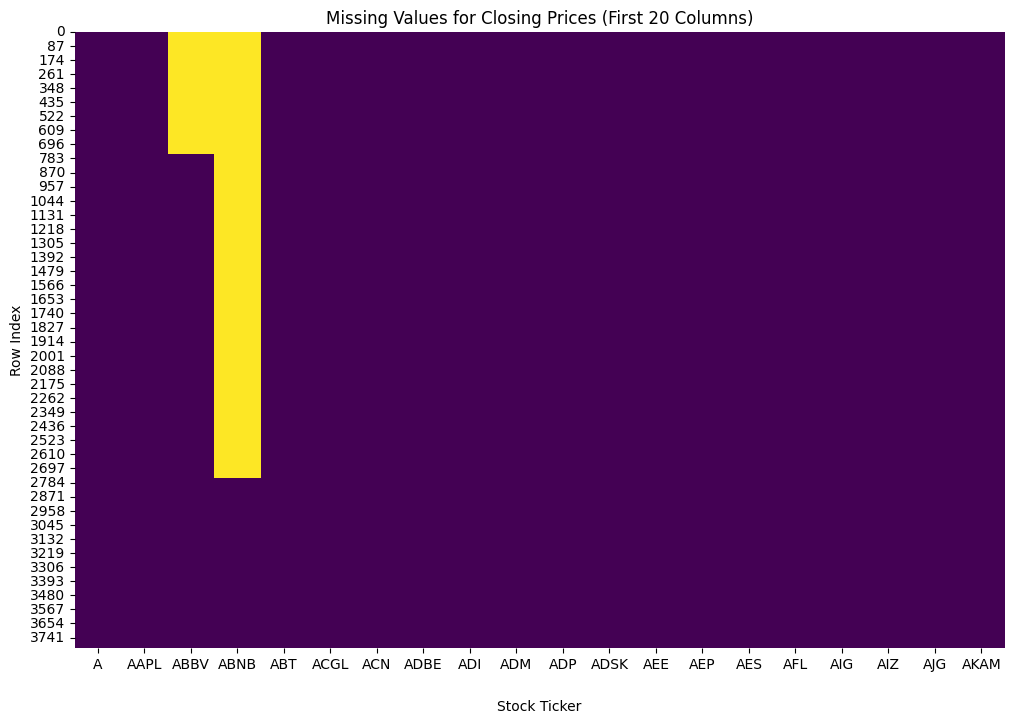


Total missing values in the entire dataset: 482630

Percentage of missing values in the dataset: 0.05044026408738478


In [5]:
# EDA for missing values in the dataset 

import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

ticker_names = df.iloc[0, 1:21].tolist()  
subset_cols = df.columns[1:21]  
# Calculate missing values
missing_values = df[subset_cols].isna().sum()
missing_values_table = pd.DataFrame({
    "Column Index": subset_cols,
    "Ticker": ticker_names,
    "Number of Missing Values": missing_values
})

print("Missing values per column in the first 20 columns:")
print(tabulate(missing_values_table, headers="keys", tablefmt="pretty", showindex=False))

plt.figure(figsize=(12, 8))
sns.heatmap(df[subset_cols].isna(), cbar=False, cmap="viridis")
plt.xticks(ticks=np.arange(len(subset_cols)) + 0.5, labels=ticker_names, rotation=0)
plt.xlabel("Stock Ticker", labelpad=20)  
plt.title("Missing Values for Closing Prices (First 20 Columns)")
plt.ylabel("Row Index")
plt.show()

total_missing_values = df.isna().sum().sum()
print(f"\nTotal missing values in the entire dataset: {total_missing_values}")
percentage_of_missing_values = total_missing_values / (df.shape[0] * df.shape[1])
print(f"\nPercentage of missing values in the dataset: {percentage_of_missing_values}") 

In [6]:
# Sorting stocks into groups based on data availability

header_row_0 = df.iloc[0]  # Ticker
header_row_1 = df.iloc[1]  # Feature
data_df = df.iloc[2:].reset_index(drop=True)  
total_trading_days = len(data_df)

# display(header_row_0.head())
# display(header_row_1.head())
# display(data_df.head())
# print(total_trading_days)

ticker_group_mapping = {}  # dictionary to store: ticker holding -> (first_valid_pos, missing_fraction, group)

# To avoid processing the same ticker twice, loop will only go over close column
count = 0
for col in range(1, df.shape[1]):
    count += 1
    if header_row_1[col] != "Close":
        break  # skip non-Close columns

    ticker = header_row_0[col]
    close_series = pd.to_numeric(data_df.iloc[:, col], errors='coerce')
    
    # Finds first non-NaN row in this series.
    first_valid_pos = close_series.first_valid_index()
    
    # If the series is all NaNs, skip
    if first_valid_pos is None:
        continue
    
    # Compute the fraction of trading days that are missing before the first entry
    # Assign to a group based on the missing_fraction:
    missing_fraction = first_valid_pos / total_trading_days
    if missing_fraction <= 0.25:
        group = "0-25%"
    elif missing_fraction <= 0.50:
        group = "26-50%"
    elif missing_fraction <= 0.75:
        group = "51-75%"
    else:
        group = "75-100%"
    
    ticker_group_mapping[ticker] = {
        "first_valid_pos": first_valid_pos,
        "missing_fraction": missing_fraction,
        "group": group
    }


group_summary = pd.DataFrame.from_dict(ticker_group_mapping, orient='index')
group_summary.index.name = "Ticker"
group_summary.reset_index(inplace=True)

print("Ticker Grouping Based on Initial Missing Data Fraction:")
print(group_summary.groupby("group").size())

unique_groups = group_summary["group"].unique()

# Loops through each group and lists the tickers
for group in unique_groups:
    tickers_in_group = group_summary[group_summary["group"] == group]
    tickers_list = tickers_in_group["Ticker"].tolist()
    print(f"Tickers in group '{group}':")
    print(tickers_list)
    print()


Ticker Grouping Based on Initial Missing Data Fraction:
group
0-25%      464
26-50%      19
51-75%      13
75-100%      7
dtype: int64
Tickers in group '0-25%':
['A', 'AAPL', 'ABBV', 'ABT', 'ACGL', 'ACN', 'ADBE', 'ADI', 'ADM', 'ADP', 'ADSK', 'AEE', 'AEP', 'AES', 'AFL', 'AIG', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALL', 'AMAT', 'AMCR', 'AMD', 'AME', 'AMGN', 'AMP', 'AMT', 'AMZN', 'ANSS', 'AON', 'AOS', 'APA', 'APD', 'APH', 'APO', 'APTV', 'ARE', 'ATO', 'AVB', 'AVGO', 'AVY', 'AWK', 'AXON', 'AXP', 'AZO', 'BA', 'BAC', 'BALL', 'BAX', 'BBY', 'BDX', 'BEN', 'BF-B', 'BG', 'BIIB', 'BK', 'BKNG', 'BKR', 'BLDR', 'BLK', 'BMY', 'BR', 'BRK-B', 'BRO', 'BSX', 'BWA', 'BX', 'BXP', 'C', 'CAG', 'CAH', 'CAT', 'CB', 'CBOE', 'CBRE', 'CCI', 'CCL', 'CDNS', 'CDW', 'CE', 'CF', 'CHD', 'CHRW', 'CHTR', 'CI', 'CINF', 'CL', 'CLX', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COO', 'COP', 'COR', 'COST', 'CPAY', 'CPB', 'CPRT', 'CPT', 'CRL', 'CRM', 'CSCO', 'CSGP', 'CSX', 'CTAS', 'CTRA', 'CTSH', 'CVS', 'CVX', 'D

In [7]:
# Creates seperate closing price dataframe for EDA and stat creation

all_tickers = []
close_columns = []
for col in range(1, df.shape[1]):
    if header_row_1[col] == "Close":
        ticker = header_row_0[col]
        all_tickers.append(ticker)
        close_columns.append(col)

print(f"Total number of stocks with price data: {len(all_tickers)}")
data_df.iloc[:, 0] = pd.to_datetime(data_df.iloc[:, 0], errors='coerce')
data_df_indexed = data_df.copy()
data_df_indexed.set_index(data_df_indexed.columns[0], inplace=True)
price_df = pd.DataFrame(index=data_df_indexed.index)

for ticker, col_idx in zip(all_tickers, close_columns):
    price_df[ticker] = pd.to_numeric(data_df_indexed.iloc[:, col_idx-1], errors='coerce')

display(price_df.head())


Total number of stocks with price data: 503


,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
0,,,,,,,,,,,,,,,,,,,,,
2010-01-04,20.02,6.44,NaN,NaN,18.67,7.60,31.94,37.09,22.26,21.24,...,52.40,9.71,41.18,12.57,39.27,NaN,18.88,52.24,28.67,NaN
2010-01-05,19.80,6.45,NaN,NaN,18.51,7.58,32.14,37.70,22.22,21.35,...,52.28,9.92,43.69,12.43,39.43,NaN,18.81,53.89,28.62,NaN
2010-01-06,19.73,6.35,NaN,NaN,18.62,7.54,32.48,37.62,22.18,21.30,...,53.13,9.81,43.12,12.45,39.77,NaN,18.68,53.87,28.40,NaN
2010-01-07,19.70,6.34,NaN,NaN,18.77,7.50,32.45,36.89,22.01,21.08,...,52.97,9.77,44.04,12.40,39.64,NaN,18.67,55.11,27.69,NaN
2010-01-08,19.70,6.38,NaN,NaN,18.87,7.48,32.32,36.69,22.13,20.81,...,52.91,9.68,43.72,12.40,39.48,NaN,18.68,53.95,27.60,NaN


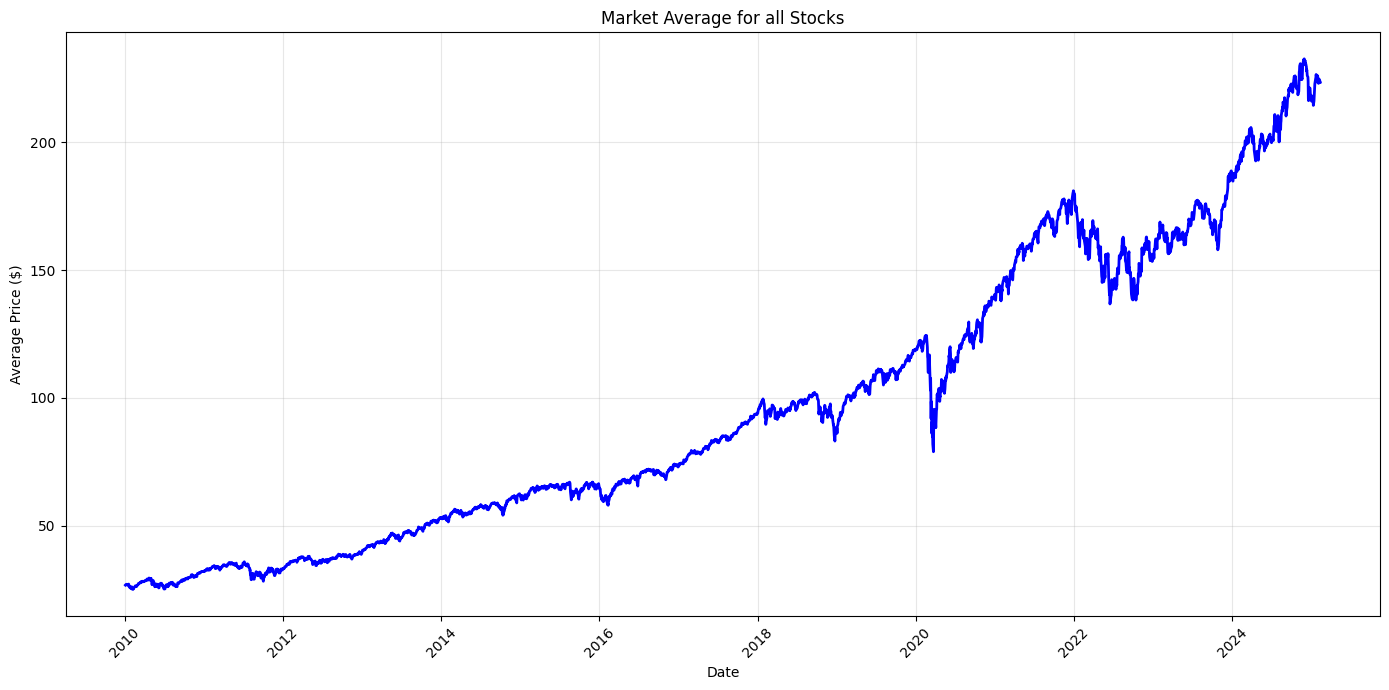

,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
0,,,,,,,,,,,,,,,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,-1.09,0.17,NaN,NaN,-0.81,-0.33,0.62,1.64,-0.16,0.54,...,-0.22,2.12,6.08,-1.19,0.39,NaN,-0.34,3.17,-0.17,NaN
2010-01-06,-0.36,-1.59,NaN,NaN,0.56,-0.43,1.06,-0.21,-0.19,-0.25,...,1.61,-1.11,-1.31,0.19,0.86,NaN,-0.71,-0.03,-0.77,NaN
2010-01-07,-0.13,-0.18,NaN,NaN,0.83,-0.59,-0.09,-1.94,-0.79,-1.05,...,-0.29,-0.45,2.14,-0.43,-0.31,NaN,-0.03,2.29,-2.50,NaN
2010-01-08,-0.03,0.66,NaN,NaN,0.51,-0.20,-0.40,-0.54,0.57,-1.25,...,-0.11,-0.92,-0.72,0.05,-0.40,NaN,0.03,-2.10,-0.33,NaN


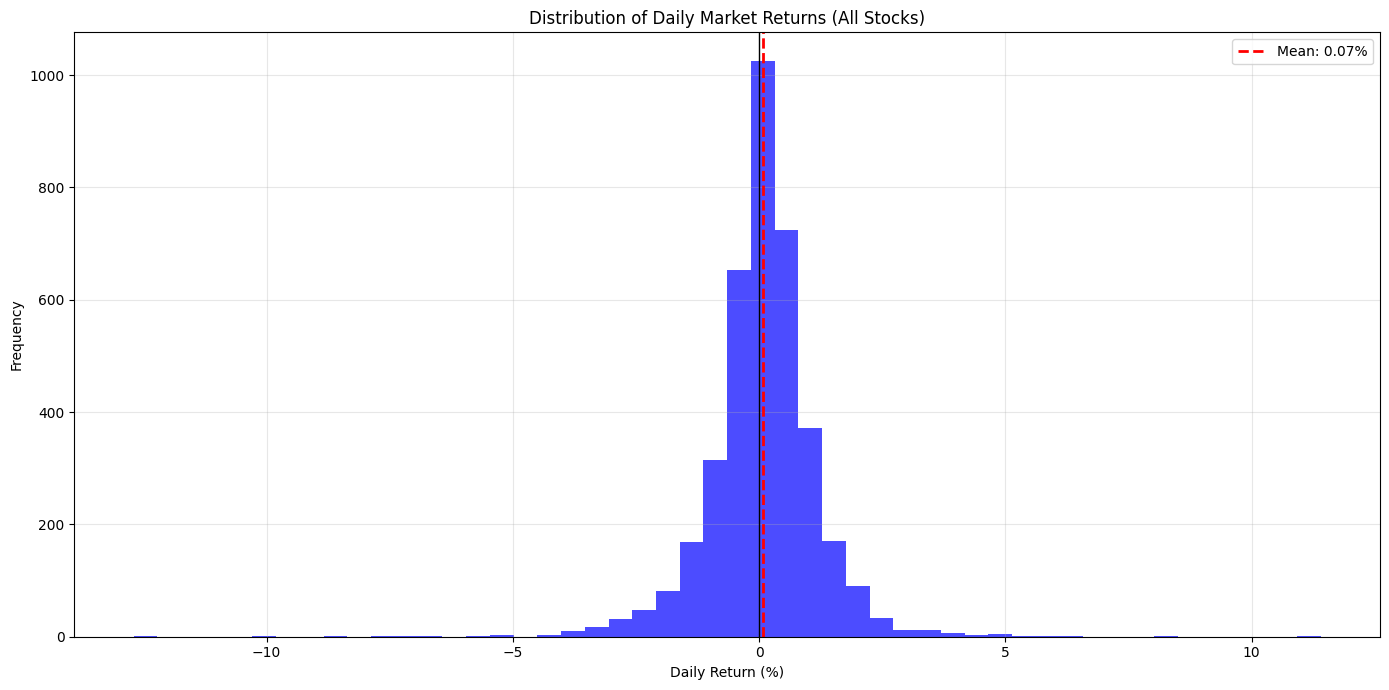

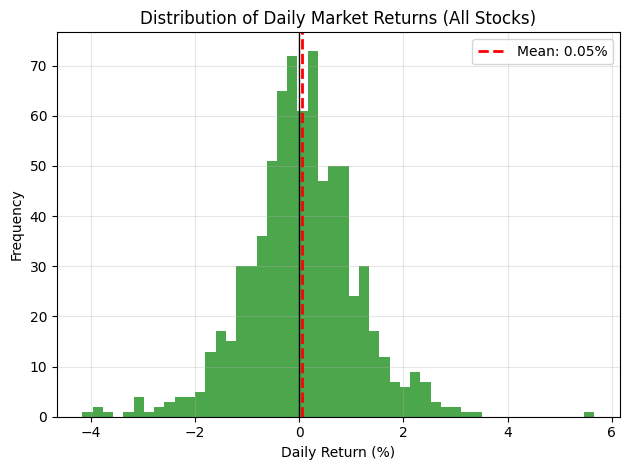

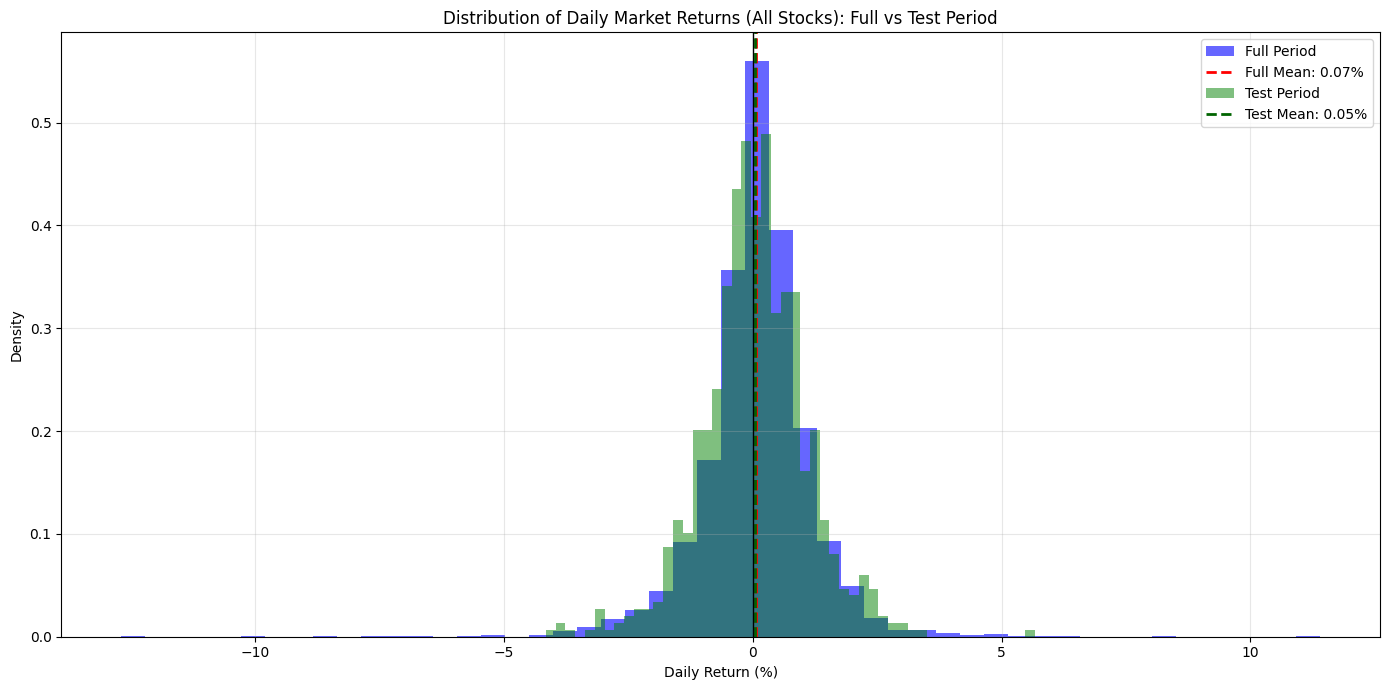

In [8]:
# EDA: Calculates and shows daily return percentages for the closing price across enture dataset timeline as well as displays the price trends we want our model
# to exhibit on our test dataset specifically (80/20 split)

# Plot average price trend (actual price value) over timeline of the dataset
market_avg = price_df[all_tickers].mean(axis=1)
plt.figure(figsize=(14, 7))
plt.plot(market_avg.index, market_avg.values, 'b-', linewidth=2)
plt.title(f"Market Average for all Stocks")
plt.xlabel("Date")
plt.ylabel("Average Price ($)")
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plots the daily return percentage for the entire dataset [(current closing price - previous day's closing price) / current closing price]
returns_df = price_df.pct_change() * 100  # Convert to percentage
display(returns_df.head())
plt.figure(figsize=(14, 7))
market_returns = returns_df[all_tickers].mean(axis=1)
market_returns.dropna(inplace=True)

plt.hist(market_returns, bins=50, alpha=0.7, color='blue', density=False)
plt.axvline(market_returns.mean(), color='r', linestyle='dashed', linewidth=2, label=f'Mean: {market_returns.mean():.2f}%')
plt.axvline(0, color='k', linestyle='solid', linewidth=1)
plt.title("Distribution of Daily Market Returns (All Stocks)")
plt.xlabel("Daily Return (%)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Same operation as above, just done on the last 20% (modeling the 80/20 split we will use when running the model) of the dataset to 
# establish what behavior the model should exhibit
market_returns_full = returns_df[all_tickers].mean(axis=1).dropna()
test_start_idx = int(len(price_df) * 0.8) 
price_df_test = price_df.iloc[test_start_idx:]  # slice the last 20%
returns_df_test = price_df_test.pct_change() * 100
market_returns_test = returns_df_test[all_tickers].mean(axis=1).dropna()

plt.hist(market_returns_test, bins=50, alpha=0.7, color='green', density=False)
plt.axvline(market_returns_test.mean(), color='r', linestyle='dashed', linewidth=2, label=f'Mean: {market_returns_test.mean():.2f}%')
plt.axvline(0, color='k', linestyle='solid', linewidth=1)
plt.title("Distribution of Daily Market Returns (All Stocks)")
plt.xlabel("Daily Return (%)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# plots previous two histograms on the same figure, normalizes y-axis frequency statistic to scale the two graphs properly
plt.figure(figsize=(14, 7))
# Full period histogram
plt.hist(market_returns_full, bins=50, alpha=0.6, color='blue', density=True, label='Full Period')
plt.axvline(market_returns_full.mean(), color='red', linestyle='dashed', linewidth=2,
            label=f'Full Mean: {market_returns_full.mean():.2f}%')

# Test period histogram
plt.hist(market_returns_test, bins=50, alpha=0.5, color='green', density=True, label='Test Period')
plt.axvline(market_returns_test.mean(), color='darkgreen', linestyle='dashed', linewidth=2,
            label=f'Test Mean: {market_returns_test.mean():.2f}%')
plt.axvline(0, color='k', linestyle='solid', linewidth=1)
plt.title("Distribution of Daily Market Returns (All Stocks): Full vs Test Period")
plt.xlabel("Daily Return (%)")
plt.ylabel("Density")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


A      0.02
AAPL   0.02
ABBV   0.02
ABNB   0.03
ABT    0.01
dtype: float64

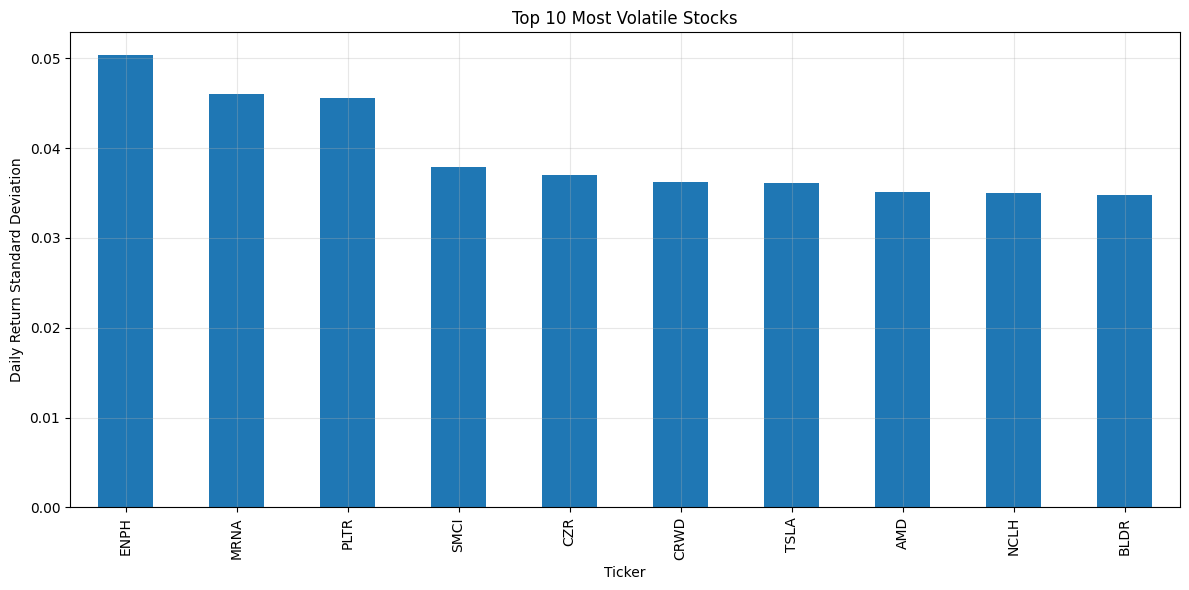

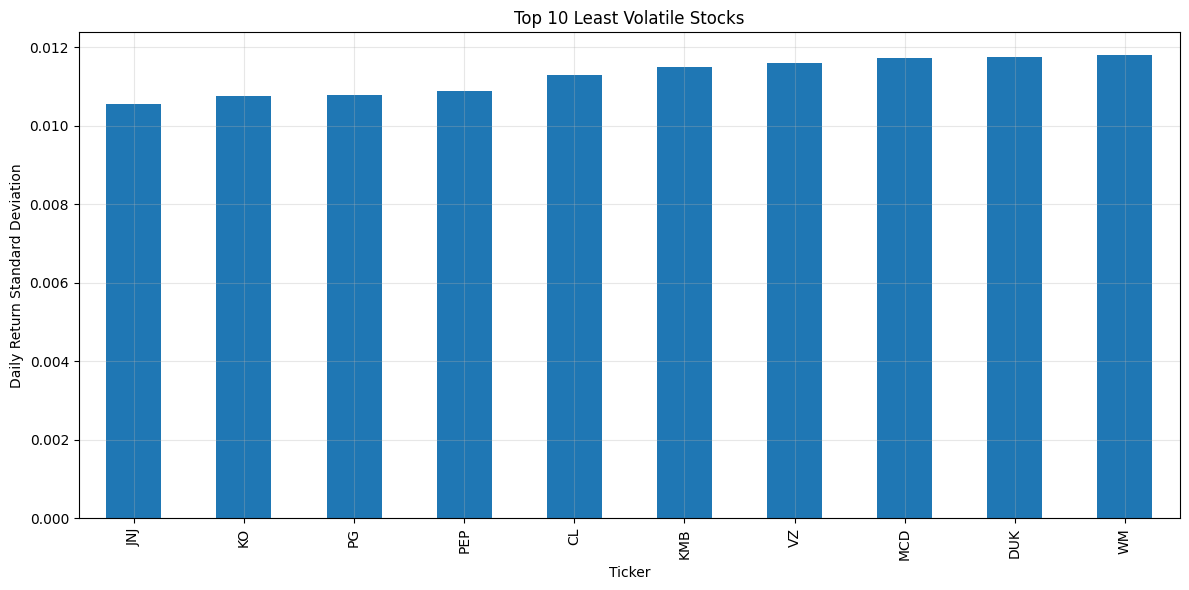

In [9]:
# Calculating volatility as an expression of most average change
volatility = returns_df.std() / 100
display(volatility.head())
# Sort and find most volatile stocks
top_volatile = volatility.sort_values(ascending=False).dropna().head(10)

plt.figure(figsize=(12, 6))
top_volatile.plot(kind='bar')
plt.title("Top 10 Most Volatile Stocks")
plt.xlabel("Ticker")
plt.ylabel("Daily Return Standard Deviation")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Sort and find least volatile stocks
lowest_volatile = volatility.sort_values(ascending=True).dropna().head(10)
plt.figure(figsize=(12, 6))
lowest_volatile.plot(kind='bar')
plt.title("Top 10 Least Volatile Stocks")
plt.xlabel("Ticker")
plt.ylabel("Daily Return Standard Deviation")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [10]:
stock_data_dict = {}  # Dictionary to store dataframes for stocks that each hold the five main features in the dataset

for ticker, group in ticker_group_mapping.items():
    temp_df = pd.DataFrame()  #Create an empty DataFrame
    
    for col_idx in range(1, df.shape[1]):  # Loop through row index 0 from column 1 onward
        if df.iloc[0, col_idx] == ticker:  # Check if the entry matches the ticker
            temp_df = pd.concat([temp_df, df.iloc[:, col_idx]], axis=1)  # Append matching column
    
    temp_df.columns = temp_df.iloc[1]  # Set row 1 as column headers
    temp_df = temp_df.drop([0, 1]).reset_index(drop=True)  # Drop the first two rows (header and redundant row)
    numeric_cols = ['Close', 'High', 'Low', 'Open', 'Volume']
    for col in numeric_cols:
      temp_df[col] = pd.to_numeric(temp_df[col], errors='coerce')
    stock_data_dict[ticker] = temp_df 

# Example of retrieving stock data for specific stocks: 
aapl_df = stock_data_dict.get('AAPL')
key_df = stock_data_dict.get('KEY')
uber_df = stock_data_dict.get('UBER')

display(aapl_df.head())
display(key_df.head())
display(uber_df.head()) # should be all NaN rows because it was avaiable for public trade later
print(len(stock_data_dict)) # number of stocks


1,Close,High,Low,Open,Volume
0,6.44,6.46,6.39,6.42,493729600.00
1,6.45,6.49,6.42,6.46,601904800.00
2,6.35,6.48,6.34,6.45,552160000.00
3,6.34,6.38,6.29,6.37,477131200.00
4,6.38,6.38,6.29,6.33,447610800.00


1,Close,High,Low,Open,Volume
0,3.74,3.76,3.55,3.56,14901600.00
1,3.88,3.89,3.70,3.70,16660800.00
2,3.86,3.90,3.81,3.88,11785800.00
3,4.02,4.08,3.80,3.82,25554700.00
4,4.09,4.13,3.99,3.99,16513200.00


1,Close,High,Low,Open,Volume
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN


503


In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

# Feature Engineering function: takes in a df parameter (individual stock dataframes in the dictionary filled in previous cell) and calculates technical 
# indicators before appending the new statistics to the dataframe. Returns new dataframe
# SMA: Simple Moving Average of the 'Close' price over sma_window days.
# RSI: Relative Strength Index computed over rsi_period days.
# ATR: Average True Range over atr_period days.
# VWAP: Volume Weighted Average Price using cumulative sums.
def add_technical_indicators(df, sma_window=20, rsi_period=14, atr_period=14):
    df = df.copy()
    
    # Simple Moving Average (SMA)
    df['SMA'] = df['Close'].rolling(window=sma_window).mean()
    
    # Relative Strength Index (RSI)
    delta = df['Close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=rsi_period, min_periods=rsi_period).mean()
    avg_loss = loss.rolling(window=rsi_period, min_periods=rsi_period).mean()
    rs = avg_gain / avg_loss
    df['RSI'] = 100 - (100 / (1 + rs))
    
    # Average True Range (ATR)
    high_low = df['High'] - df['Low']
    high_close = (df['High'] - df['Close'].shift()).abs()
    low_close = (df['Low'] - df['Close'].shift()).abs()
    true_range = pd.concat([high_low, high_close, low_close], axis=1).max(axis=1)
    df['ATR'] = true_range.rolling(window=atr_period).mean()
    
    # Volume Weighted Average Price (VWAP)
    typical_price = (df['High'] + df['Low'] + df['Close']) / 3
    df['VWAP'] = (typical_price * df['Volume']).cumsum() / df['Volume'].cumsum()
    
    return df

# Prepares the feature matrix X and target vector y for modeling. Shift_target and target_col variable represents the target variable, which in this case is
# the next day's closing price but it is variable: you can edit the amount of days and target feature 
def prepare_model_data(df, features, target_col='Close', shift_target=-1):
    df = df.copy()
    # Create target variable (next day's closing price)
    df['Target'] = df[target_col].shift(shift_target)
    # Drop rows with NA values (from new indicator calculations and shifting)
    df.dropna(inplace=True)
    X = df[features]
    y = df['Target']
    return X, y

# Takes in feature matrix X and target vector y from previous function. Splits data, scales features, trains an XGBoost regressor, 
# and returns predictions and performance metrics.
def run_xgb_model(X, y):
    # Train/test split (using time order; adjust test_size as needed)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    #----------------------------------------------------------- For model run with PCA
    # Dimensionality Reduction
    # pca = PCA(n_components=0.95)
    # X_train_pca = pca.fit_transform(X_train_scaled)
    # X_test_pca = pca.transform(X_test_scaled)
    
    # Train baseline XGBoost Regressor
    model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
    model.fit(X_train_scaled, y_train)
    
    # Predict and evaluate
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    metrics = {'MSE': mse, 'MAE': mae, 'R2': r2}
    
    return model, scaler, metrics, y_test, y_pred

# 4. Runs grid search with cross-validation to optimize the hyperparameters of XGBoost. Returns the best model, parameters, and performance metrics.
def run_grid_search_xgb(X, y, scaler):
    # Split the data (using same procedure as before)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    #----------------------------------------------------------- For model run with PCA
    # X_train_pca = pca.fit_transform(X_train_scaled)
    # X_test_pca = pca.transform(X_test_scaled)
    
    # Define model and parameter grid
    model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
    param_grid = {
        'learning_rate': [0.05, 0.1, 0.3],  
        'n_estimators': [100, 200, 300],    
        'max_depth': [3, 5, 7] 
    }
    
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                               scoring='neg_mean_squared_error', cv=3, verbose=1)
    grid_search.fit(X_train_scaled, y_train)
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    
    # Evaluate best model
    y_pred = best_model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    metrics = {'MSE': mse, 'MAE': mae, 'R2': r2}
    
    return best_params, metrics, y_test, y_pred

features = ['Open', 'High', 'Low', 'Close', 'Volume', 
            'SMA', 'RSI', 'ATR', 'VWAP']

all_tickers = list(stock_data_dict.keys())
results_baseline = []
results_improved = []

# Main loop. Traverses through every unique stock name and goes through the previous 4 functions for each one. 
# All results are stores in the results_baseline and results_improved lists. Baseline being results after running XGBoost Regression model
# with default hyperparameters, improved storing the best hyperparamters found with grid search, improved metrics, as well as a list of all predictions
for ticker in all_tickers:
    print(f"Processing {ticker}")
    df_stock = stock_data_dict[ticker]
    # 1. Calculate technical indicators
    df_stock_ind = add_technical_indicators(df_stock)
    
    # 2. Prepare model data (target is next day's closing price)
    X, y = prepare_model_data(df_stock_ind, features, target_col='Close', shift_target=-1)
    
    # 3. Baseline XGB Model
    model, scaler, metrics, y_test, y_pred = run_xgb_model(X, y)
    result_baseline = {
        'Ticker': ticker,
        'MSE': metrics['MSE'],
        'MAE': metrics['MAE'],
        'R2': metrics['R2'],
        'Predictions': y_pred  # array of predicted prices on test set
    }
    results_baseline.append(result_baseline)
    
    # 4. Grid Search for Improved XGB Model
    best_params, metrics_improved, y_test_improved, y_pred_improved = run_grid_search_xgb(X, y, scaler)
    result_improved = {
        'Ticker': ticker,
        'Best_Params': best_params,
        'MSE': metrics_improved['MSE'],
        'MAE': metrics_improved['MAE'],
        'R2': metrics_improved['R2'],
        'Predictions': y_pred_improved
    }
    results_improved.append(result_improved)

# Create dataframe for baseline and improved performance, easier to edit
baseline_table = pd.DataFrame(results_baseline)
improved_table = pd.DataFrame(results_improved)

# Save results to CSV (to prevent data loss from kernal restarts)
baseline_table.to_csv('final_baseline_xgb_results.csv', index=False)
improved_table.to_csv('final_improved_xgb_results2.csv', index=False)

print("Baseline XGB Regressor Performance:")
display(baseline_table.head())

print("\nImproved XGB Regressor Performance after Grid Search:")
display(improved_table.head())

#----------------------------------------------------------- For model run with PCA
# baseline_table.to_csv('baseline_with_pca.csv', index=False)
# improved_table.to_csv('improved_with_pca.csv', index=False)


Processing A
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Processing AAPL
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Processing ABBV
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Processing ABNB
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Processing ABT
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Processing ACGL
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Processing ACN
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Processing ADBE
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Processing ADI
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Processing ADM
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Processing ADP
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Processing ADSK
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Processing AEE
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Processi

,Ticker,MSE,MAE,R2,Predictions
0,A,18.268993,3.315126,0.866833,"[139.4325, 139.34013, 135.57425, 136.65434, 13..."
1,AAPL,843.740384,18.914237,0.136728,"[173.45514, 172.14561, 170.17715, 172.74878, 1..."
2,ABBV,534.655562,15.859418,-0.319860,"[128.716, 127.19908, 127.71408, 130.72285, 130..."
3,ABNB,14.327117,2.948850,0.902798,"[153.8249, 155.47427, 157.42592, 156.15587, 15..."
4,ABT,5.637740,1.876703,0.902530,"[123.99345, 123.56688, 123.157234, 121.35299, ..."



Improved XGB Regressor Performance after Grid Search:


,Ticker,Best_Params,MSE,MAE,R2,Predictions
0,A,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",15.299911,3.078867,0.888475,"[141.0394, 140.94997, 136.81636, 136.56686, 14..."
1,AAPL,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",763.178367,17.459659,0.219155,"[172.6272, 172.6272, 170.24132, 172.89769, 173..."
2,ABBV,"{'learning_rate': 0.3, 'max_depth': 7, 'n_esti...",541.968656,16.024161,-0.337913,"[128.89542, 127.03155, 127.63433, 130.67566, 1..."
3,ABNB,"{'learning_rate': 0.05, 'max_depth': 3, 'n_est...",8.838413,2.143783,0.940036,"[153.89328, 156.30017, 158.9225, 155.60645, 15..."
4,ABT,"{'learning_rate': 0.3, 'max_depth': 3, 'n_esti...",8.221429,2.243090,0.857860,"[123.29837, 123.57313, 123.47965, 122.434296, ..."


RESULTS

In [ ]:
# RESULTS
import pandas as pd

improved_df = pd.read_csv('final_improved_xgb_results2.csv')
display(improved_df.head())
print(improved_df.index) 
results_improved = improved_df.to_dict(orient='records')
best_params = improved_df[improved_df['Ticker'] == ticker]['Best_Params'].iloc[0]
display(best_params)

merged_df = pd.merge(improved_df, group_summary[['Ticker', 'group']], on='Ticker', how='left')

print("Group Summary Columns:", group_summary.columns)
print("First few rows of group_summary:")
display(group_summary.head())
print("First few rows of merged_df:")
display(merged_df.head())

# 20 Best Performing Stocks (highest R2 values)
best_stocks = merged_df.sort_values(by='R2', ascending=False).head(20)
print("20 Best Performing Stocks:")
display(best_stocks[['Ticker', 'MSE', 'MAE', 'R2', 'group']])

# 20 Worst Performing Stocks (lowest R2 values)
worst_stocks = merged_df.sort_values(by='R2', ascending=True).head(20)
print("\n20 Worst Performing Stocks:")
display(worst_stocks[['Ticker', 'MSE', 'MAE', 'R2', 'group']])

# Aggregate performance on all stocks
agg_performance_all = merged_df[['MSE', 'MAE', 'R2']].agg(['mean', 'median', 'std'])
print("\nAggregate Performance on All Stocks:")
display(agg_performance_all)

# Aggregate performance by missing data group
agg_performance_by_group = merged_df.groupby('group')[['MSE', 'MAE', 'R2']].agg(['mean', 'median', 'std'])
print("\nAggregate Performance by Group:")
display(agg_performance_by_group)



,Ticker,Best_Params,MSE,MAE,R2,Predictions
0,A,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",15.299911,3.078867,0.888475,[141.0394 140.94997 136.81636 136.56686 1...
1,AAPL,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",763.178367,17.459659,0.219155,[172.6272 172.6272 170.24132 172.89769 1...
2,ABBV,"{'learning_rate': 0.3, 'max_depth': 7, 'n_esti...",541.968656,16.024161,-0.337913,[128.89542 127.03155 127.63433 130.67566 1...
3,ABNB,"{'learning_rate': 0.05, 'max_depth': 3, 'n_est...",8.838413,2.143783,0.940036,[153.89328 156.30017 158.9225 155.60645 1...
4,ABT,"{'learning_rate': 0.3, 'max_depth': 3, 'n_esti...",8.221429,2.243090,0.857860,[123.29837 123.57313 123.47965 122.434296 1...


RangeIndex(start=0, stop=503, step=1)


"{'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 100}"

Group Summary Columns: Index(['Ticker', 'first_valid_pos', 'missing_fraction', 'group'], dtype='object')
First few rows of group_summary:


,Ticker,first_valid_pos,missing_fraction,group
0,A,0,0.000000,0-25%
1,AAPL,0,0.000000,0-25%
2,ABBV,754,0.198369,0-25%
3,ABNB,2754,0.724546,51-75%
4,ABT,0,0.000000,0-25%


First few rows of merged_df:


,Ticker,Best_Params,MSE,MAE,R2,Predictions,group
0,A,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",15.299911,3.078867,0.888475,[141.0394 140.94997 136.81636 136.56686 1...,0-25%
1,AAPL,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",763.178367,17.459659,0.219155,[172.6272 172.6272 170.24132 172.89769 1...,0-25%
2,ABBV,"{'learning_rate': 0.3, 'max_depth': 7, 'n_esti...",541.968656,16.024161,-0.337913,[128.89542 127.03155 127.63433 130.67566 1...,0-25%
3,ABNB,"{'learning_rate': 0.05, 'max_depth': 3, 'n_est...",8.838413,2.143783,0.940036,[153.89328 156.30017 158.9225 155.60645 1...,51-75%
4,ABT,"{'learning_rate': 0.3, 'max_depth': 3, 'n_esti...",8.221429,2.243090,0.857860,[123.29837 123.57313 123.47965 122.434296 1...,0-25%


20 Best Performing Stocks:


,Ticker,MSE,MAE,R2,group
484,WDC,2.330267,1.131070,0.986590,0-25%
360,PARA,0.638189,0.606191,0.985180,0-25%
313,MMM,6.124217,1.816758,0.984541,0-25%
140,DOC,0.179634,0.324845,0.984201,0-25%
317,MOS,1.855283,0.937763,0.983777,0-25%
169,ESS,24.169366,3.904358,0.982181,0-25%
495,WYNN,4.722849,1.586571,0.979897,0-25%
466,USB,0.725709,0.648201,0.979606,0-25%
128,DD,1.569668,0.881349,0.979292,0-25%
57,BF-B,2.077728,1.092771,0.979266,0-25%



20 Worst Performing Stocks:


,Ticker,MSE,MAE,R2,group
123,CVX,1119.325066,32.083702,-11.628970,0-25%
338,NOC,9333.446152,91.049086,-7.876244,0-25%
221,HES,2573.719648,47.468560,-7.485012,0-25%
105,COP,863.188908,27.078227,-5.951671,0-25%
497,XOM,1118.575642,30.819085,-5.858593,0-25%
153,ED,175.901942,11.971465,-4.068176,0-25%
357,OTIS,58.931792,6.810190,-3.670175,51-75%
420,STLD,2239.030201,42.057758,-3.605040,0-25%
458,UBER,154.310836,10.850439,-3.539182,51-75%
301,MCK,42978.268771,182.071238,-3.352379,0-25%



Aggregate Performance on All Stocks:


,MSE,MAE,R2
mean,12079.848387,23.677662,0.195160
median,97.674737,6.785034,0.699403
std,128919.018718,73.214841,1.223203



Aggregate Performance by Group:


MSE                                   MAE            \
                 mean      median            std       mean    median   
group                                                                   
0-25%    13037.140692  105.852756  134194.280389  24.654538  6.937046   
26-50%     898.434612   29.043836    1395.096202  14.938837  3.672316   
51-75%     394.865076   16.856558    1127.051612   8.297367  2.207886   
75-100%    675.279137    2.644244    1151.550721  11.207837  1.308551   

                          R2                      
               std      mean    median       std  
group                                             
0-25%    76.015054  0.219402  0.712540  1.208245  
26-50%   17.528905 -0.037896  0.603112  1.194171  
51-75%   13.422999 -0.306805  0.699012  1.806849  
75-100%  17.461620  0.153048  0.502644  0.979226

Index(['Ticker', 'Best_Params', 'MSE', 'MAE', 'R2', 'Predictions'], dtype='object')
Ticker          object
Best_Params     object
MSE            float64
MAE            float64
R2             float64
Predictions     object
dtype: object
Ticker          object
Best_Params     object
MSE            float64
MAE            float64
R2             float64
Predictions     object
dtype: object


0    [141.0394, 140.94997, 136.81636, 136.56686, 14...
1    [172.6272, 172.6272, 170.24132, 172.89769, 173...
2    [128.89542, 127.03155, 127.63433, 130.67566, 1...
3    [153.89328, 156.30017, 158.9225, 155.60645, 15...
4    [123.29837, 123.57313, 123.47965, 122.434296, ...
Name: Predictions, dtype: object

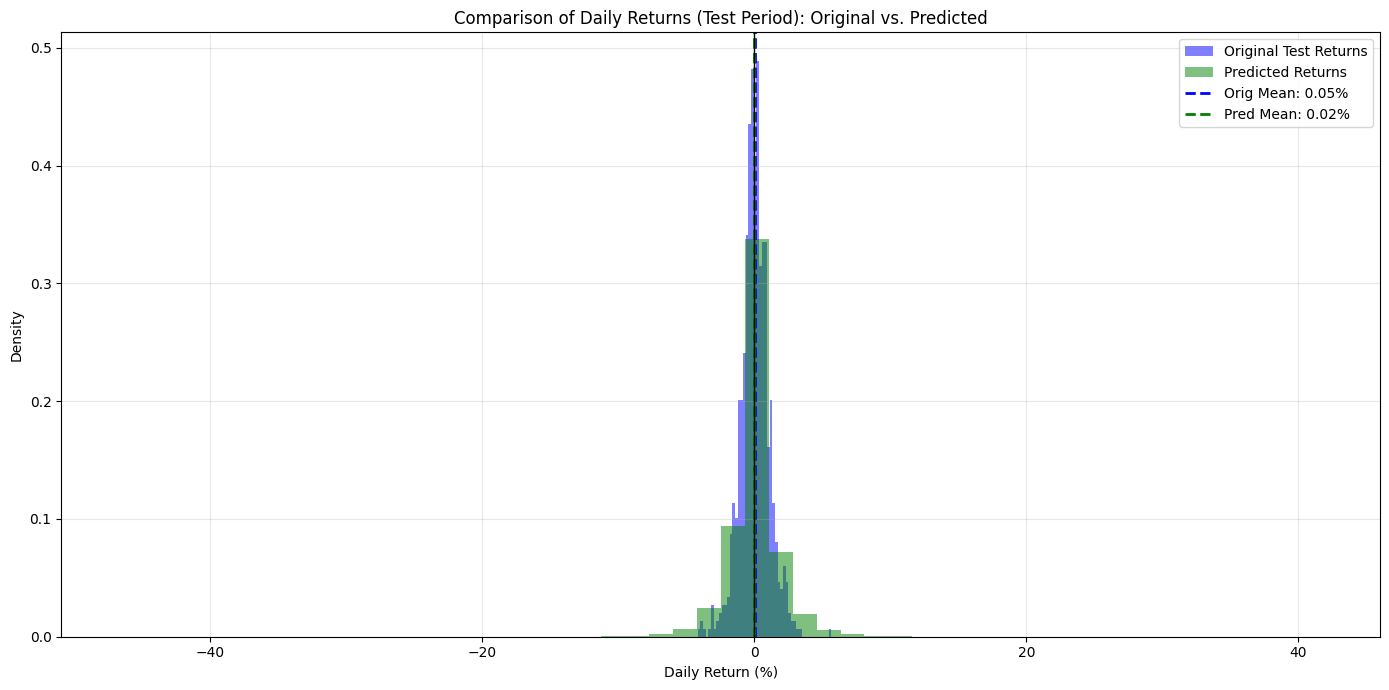

In [11]:
# Results Data Analysis

print(improved_df.columns)
print(improved_df.dtypes)

def parse_predictions(pred_str):
    # Remove the surrounding brackets and extra whitespace
    numbers_str = pred_str.strip('[]').strip()
    return [float(num) for num in numbers_str.split()]

improved_df['Predictions'] = improved_df['Predictions'].apply(parse_predictions)

print(improved_df.dtypes)
display(improved_df['Predictions'].head())

results_improved = improved_df.to_dict(orient='records') # to dictionary
predicted_returns_list = []
for result in results_improved:
    preds = np.array(result['Predictions'])
    daily_pred_returns = (np.diff(preds) / preds[:-1]) * 100  
    predicted_returns_list.append(daily_pred_returns)

all_predicted_returns = np.concatenate(predicted_returns_list)

# Combined plot comparing original and predicted returns
plt.figure(figsize=(14, 7))
plt.hist(market_returns_test, bins=50, alpha=0.5, color='blue', density=True, label='Original Test Returns')
plt.hist(all_predicted_returns, bins=50, alpha=0.5, color='green', density=True, label='Predicted Returns')
plt.axvline(np.mean(market_returns_test), color='blue', linestyle='dashed', linewidth=2,
            label=f'Orig Mean: {np.mean(market_returns_test):.2f}%')
plt.axvline(np.mean(all_predicted_returns), color='green', linestyle='dashed', linewidth=2,
            label=f'Pred Mean: {np.mean(all_predicted_returns):.2f}%')
plt.axvline(0, color='black', linestyle='solid', linewidth=1)
plt.title("Comparison of Daily Returns (Test Period): Original vs. Predicted")
plt.xlabel("Daily Return (%)")
plt.ylabel("Density")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
 


Stock Counts by Group:
group
0-25%      464
26-50%      19
51-75%      13
75-100%      7
Name: count, dtype: int64


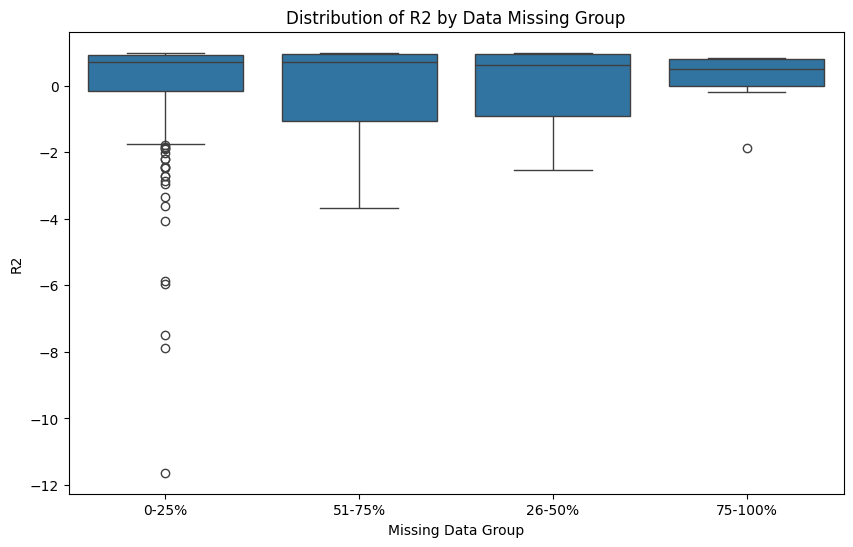

Merged DataFrame Head (with Market Stats):


,Ticker,Best_Params,MSE,MAE,R2,Predictions,group,Volatility,Mean_Return
0,A,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",15.299911,3.078867,0.888475,[141.0394 140.94997 136.81636 136.56686 1...,0-25%,0.017953,0.067683
1,AAPL,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",763.178367,17.459659,0.219155,[172.6272 172.6272 170.24132 172.89769 1...,0-25%,0.017565,0.109866
2,ABBV,"{'learning_rate': 0.3, 'max_depth': 7, 'n_esti...",541.968656,16.024161,-0.337913,[128.89542 127.03155 127.63433 130.67566 1...,0-25%,0.016593,0.085864
3,ABNB,"{'learning_rate': 0.05, 'max_depth': 3, 'n_est...",8.838413,2.143783,0.940036,[153.89328 156.30017 158.9225 155.60645 1...,51-75%,0.030580,0.039698
4,ABT,"{'learning_rate': 0.3, 'max_depth': 3, 'n_esti...",8.221429,2.243090,0.857860,[123.29837 123.57313 123.47965 122.434296 1...,0-25%,0.013533,0.060546


Text(0, 0.5, 'R2')

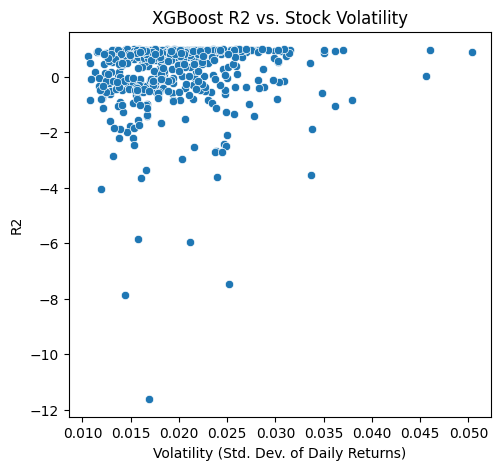

In [12]:
# More data analysis for results

# Count of stocks in each group
group_counts = merged_df['group'].value_counts()
print("\nStock Counts by Group:")
print(group_counts)

# Boxplot of R2 values by Data Missing Group
plt.figure(figsize=(10, 6))
sns.boxplot(x='group', y='R2', data=merged_df)
plt.title("Distribution of R2 by Data Missing Group")
plt.xlabel("Missing Data Group")
plt.ylabel("R2")
plt.show()

mean_return = returns_df.mean()         # Mean daily return
performance_stats = pd.DataFrame({
    'Ticker': volatility.index,
    'Volatility': volatility.values,
    'Mean_Return': mean_return.values
})

merged_df2 = pd.merge(merged_df, performance_stats, on='Ticker', how='left')
print("Merged DataFrame Head (with Market Stats):")
display(merged_df2.head())

# Scatter Plot: R2 vs. Volatility and R2 vs. Average Volume
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(data=merged_df2, x='Volatility', y='R2')
plt.title("XGBoost R2 vs. Stock Volatility")
plt.xlabel("Volatility (Std. Dev. of Daily Returns)")
plt.ylabel("R2")

Processing A with parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Processing AAPL with parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Processing ABBV with parameters: {'learning_rate': 0.3, 'max_depth': 7, 'n_estimators': 200}
Processing ABNB with parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
Processing ABT with parameters: {'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 100}
Processing ACGL with parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Processing ACN with parameters: {'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 100}
Processing ADBE with parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Processing ADI with parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}
Processing ADM with parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Processing ADP with parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_

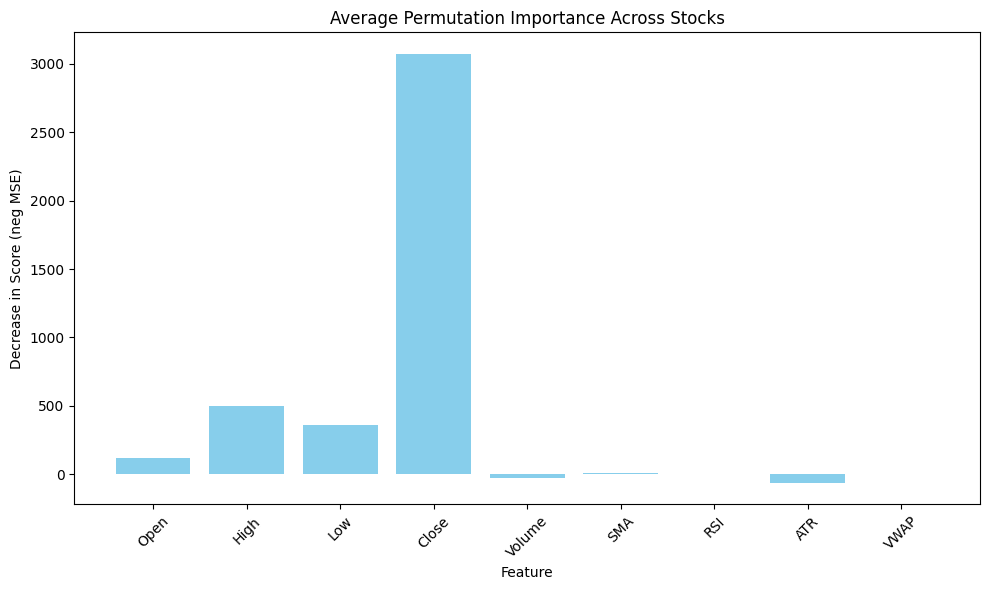

In [15]:
import ast as ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance

# Function implementation same as before, repeated to execute permutation importance
# This way, repeated running of the model + grid search is not necessary to save these methods to kernal
def add_technical_indicators(df, sma_window=20, rsi_period=14, atr_period=14):
    df = df.copy()
    df['SMA'] = df['Close'].rolling(window=sma_window).mean()
    delta = df['Close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=rsi_period, min_periods=rsi_period).mean()
    avg_loss = loss.rolling(window=rsi_period, min_periods=rsi_period).mean()
    rs = avg_gain / avg_loss
    df['RSI'] = 100 - (100 / (1 + rs))
    high_low = df['High'] - df['Low']
    high_close = (df['High'] - df['Close'].shift()).abs()
    low_close = (df['Low'] - df['Close'].shift()).abs()
    true_range = pd.concat([high_low, high_close, low_close], axis=1).max(axis=1)
    df['ATR'] = true_range.rolling(window=atr_period).mean()
    typical_price = (df['High'] + df['Low'] + df['Close']) / 3
    df['VWAP'] = (typical_price * df['Volume']).cumsum() / df['Volume'].cumsum()
    return df

def prepare_model_data(df, features, target_col='Close', shift_target=-1):
    df = df.copy()
    df['Target'] = df[target_col].shift(shift_target)
    df.dropna(inplace=True)
    X = df[features]
    y = df['Target']
    return X, y

features = ['Open', 'High', 'Low', 'Close', 'Volume', 'SMA', 'RSI', 'ATR', 'VWAP']
results = []

# Loop through all rows of improved_df 
for idx, row in improved_df.iterrows():
    ticker = row['Ticker']
    
    # Retrieve best parameters
    best_params = row['Best_Params']
    if isinstance(best_params, str):
        best_params = ast.literal_eval(best_params)
    
    print(f"Processing {ticker} with parameters: {best_params}")
    
    # Retrieve stock data for ticker
    df_stock = stock_data_dict.get(ticker)
    if df_stock is None:
        print(f"Data for {ticker} not found; skipping.")
        continue
    
    df_stock_ind = add_technical_indicators(df_stock)
    X, y = prepare_model_data(df_stock_ind, features)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, **best_params)
    model.fit(X_train_scaled, y_train)
    perm_importance = permutation_importance(model, X_test_scaled, y_test,
                                             scoring='neg_mean_squared_error',
                                             n_repeats=1, random_state=42)
    
    # Save the permutation importance results
    results.append({
        'Ticker': ticker,
        'perm_importance_mean': perm_importance.importances_mean,
        'perm_importance_std': perm_importance.importances_std
    })

# Convert the results to a DataFrame for analysis
results_df = pd.DataFrame(results)
print(results_df)

# aggregates the mean importances for each feature
avg_importance_dict = {feature: [] for feature in features}
for result in results:
    for i, feature in enumerate(features):
        avg_importance_dict[feature].append(result['perm_importance_mean'][i])

# Compute the average importance for each feature
avg_importance = {feature: np.mean(values) for feature, values in avg_importance_dict.items()}
plt.figure(figsize=(10, 6))
plt.bar(avg_importance.keys(), avg_importance.values(), color='skyblue')
plt.title("Average Permutation Importance Across Stocks")
plt.ylabel("Decrease in Score (neg MSE)")
plt.xlabel("Feature")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


0    [145.24129, 144.99487, 145.57422, 145.53012, 1...
1    [170.3841, 172.42218, 172.9811, 175.53137, 175...
2    [128.06429, 128.0487, 127.57698, 128.2346, 133...
3    [151.2439, 158.16383, 161.21657, 155.15977, 15...
4    [126.12552, 127.34073, 127.18011, 127.31282, 1...
Name: Predictions, dtype: object

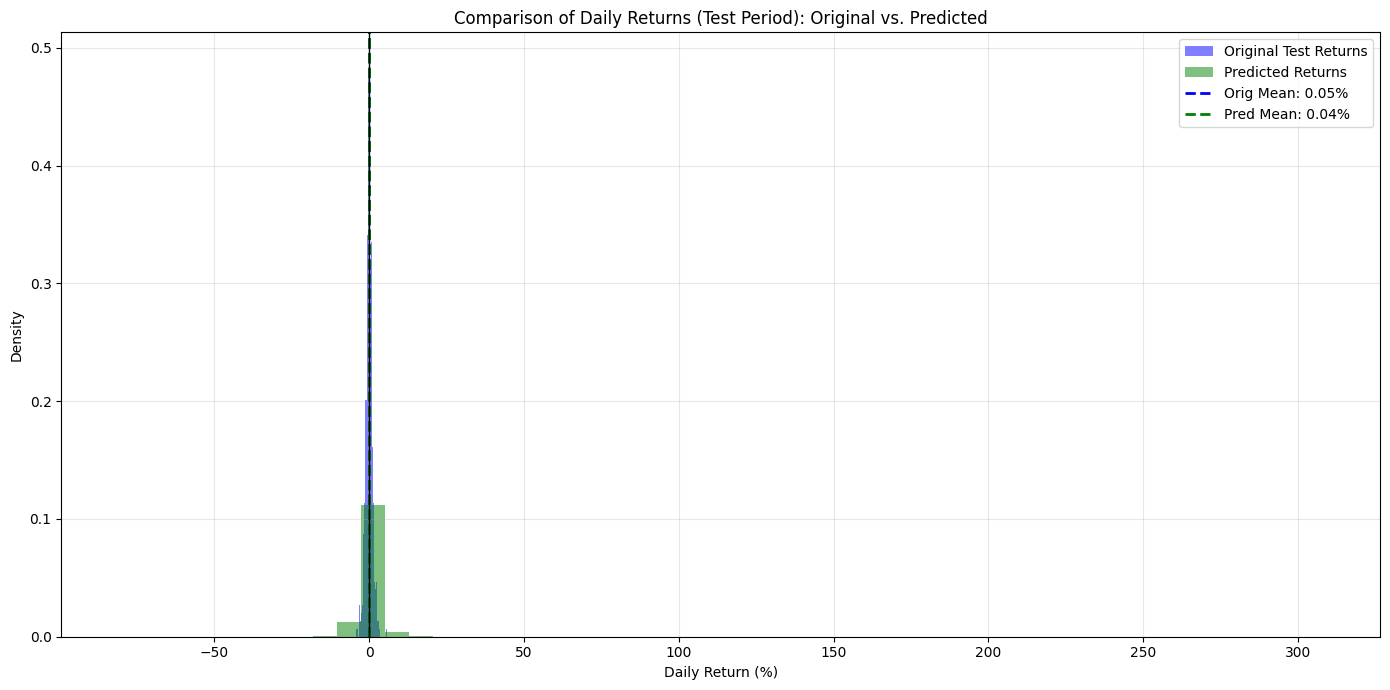

In [76]:
# Same process as Comparison between predicted and actual daily returns percentage, in this case executed on results that were the product
# of running PCA dimensionality reduction along with the model

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read and parse predictions
improved_df = pd.read_csv('improved_with_pca.csv')
def parse_predictions(pred_str):
    numbers_str = pred_str.strip('[]').strip()
    return [float(num) for num in numbers_str.split()]

improved_df['Predictions'] = improved_df['Predictions'].apply(parse_predictions)
display(improved_df['Predictions'].head())

results_improved = improved_df.to_dict(orient='records')
predicted_returns_list = []
for result in results_improved:
    preds = np.array(result['Predictions'])
    daily_pred_returns = (np.diff(preds) / preds[:-1]) * 100  
    predicted_returns_list.append(daily_pred_returns)

# Combine predicted returns across stocks into one array
all_predicted_returns = np.concatenate(predicted_returns_list)

# Plot density histograms for comparison
plt.figure(figsize=(14, 7))
plt.hist(market_returns_test, bins=50, alpha=0.5, color='blue', density=True, label='Original Test Returns')
plt.hist(all_predicted_returns, bins=50, alpha=0.5, color='green', density=True, label='Predicted Returns')
plt.axvline(np.mean(market_returns_test), color='blue', linestyle='dashed', linewidth=2,
            label=f'Orig Mean: {np.mean(market_returns_test):.2f}%')
plt.axvline(np.mean(all_predicted_returns), color='green', linestyle='dashed', linewidth=2,
            label=f'Pred Mean: {np.mean(all_predicted_returns):.2f}%')
plt.axvline(0, color='black', linestyle='solid', linewidth=1)
plt.title("Comparison of Daily Returns (Test Period): Original vs. Predicted")
plt.xlabel("Daily Return (%)")
plt.ylabel("Density")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [14]:
import pandas as pd
import numpy as np

# Load datasets
baseline_df = pd.read_csv('final_baseline_xgb_results.csv')
improved_df = pd.read_csv('final_improved_xgb_results2.csv')

merged_improved = pd.merge(improved_df, group_summary[['Ticker', 'group']], on='Ticker', how='left')

# Compare overall median R² scores
baseline_R2_median = baseline_df['R2'].median()
improved_R2_median = improved_df['R2'].median()

print("Baseline R² Median: {:.4f}".format(baseline_R2_median))
print("Improved R² Median: {:.4f}".format(improved_R2_median))

improvement = improved_R2_median - baseline_R2_median
improvement_percent = (improvement / baseline_R2_median) * 100 if baseline_R2_median != 0 else np.nan

print("Absolute Improvement in R² (Median): {:.4f}".format(improvement))
print("Improvement Percentage (Median): {:.2f}%\n".format(improvement_percent))

baseline_MAE_median = baseline_df['MAE'].median()
improved_MAE_median = improved_df['MAE'].median()

print("Baseline MAE Median: {:.4f}".format(baseline_MAE_median))
print("Improved MAE Median: {:.4f}".format(improved_MAE_median))

improvement = improved_MAE_median - baseline_MAE_median
improvement_percent = (improvement / baseline_MAE_median) * 100 if baseline_MAE_median != 0 else np.nan

print("Absolute Improvement in MAE (Median): {:.4f}".format(improvement))
print("Improvement Percentage (Median): {:.2f}%\n".format(improvement_percent))

baseline_MSE_median = baseline_df['MSE'].median()
improved_MSE_median = improved_df['MSE'].median()

print("Baseline MSE Median: {:.4f}".format(baseline_MSE_median))
print("Improved MSE Median: {:.4f}".format(improved_MSE_median))

improvement = improved_MSE_median - baseline_MSE_median
improvement_percent = (improvement / baseline_MSE_median) * 100 if baseline_MSE_median != 0 else np.nan

print("Absolute Improvement in MAE (Median): {:.4f}".format(improvement))
print("Improvement Percentage (Median): {:.2f}%\n".format(improvement_percent))

# Remove outliers from the improved dataset using the IQR method on the R² scores
Q1 = improved_df['R2'].quantile(0.25)
Q3 = improved_df['R2'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_improved = improved_df[(improved_df['R2'] >= lower_bound) & (improved_df['R2'] <= upper_bound)]

print("Filtered Improved R² Metrics:")
print(filtered_improved['R2'].describe())

# Aggregate performance metrics (MSE, MAE, R²) without outliers
agg_performance_no_outliers = filtered_improved[['MSE', 'MAE', 'R2']].agg(['median', 'std'])
print("\nAggregate Performance on Improved Model (Outliers Removed):")
print(agg_performance_no_outliers)

# Merge filtered improved results with group summary for grouping analysis
merged_filtered = pd.merge(filtered_improved, group_summary[['Ticker', 'group']], on='Ticker', how='left')

# Aggregate performance metrics by group for the improved model (all data)
agg_performance_by_group = merged_improved.groupby('group')[['MSE', 'MAE', 'R2']].agg(['median', 'std'])
print("\nAggregate Performance by Group (Improved Model - All Data):")
print(agg_performance_by_group)

# Aggregate performance metrics by group for the improved model (outliers removed)
agg_performance_filtered_by_group = merged_filtered.groupby('group')[['MSE', 'MAE', 'R2']].agg(['median', 'std'])
print("\nAggregate Performance by Group (Improved Model - Outliers Removed):")
print(agg_performance_filtered_by_group)



Baseline R² Median: 0.6576
Improved R² Median: 0.6994
Absolute Improvement in R² (Median): 0.0418
Improvement Percentage (Median): 6.36%

Baseline MAE Median: 6.9981
Improved MAE Median: 6.7850
Absolute Improvement in MAE (Median): -0.2131
Improvement Percentage (Median): -3.04%

Baseline MSE Median: 103.6331
Improved MSE Median: 97.6747
Absolute Improvement in MAE (Median): -5.9584
Improvement Percentage (Median): -5.75%

Filtered Improved R² Metrics:
count   475.00
mean      0.41
std       0.65
min      -1.75
25%      -0.06
50%       0.74
75%       0.91
max       0.99
Name: R2, dtype: float64

Aggregate Performance on Improved Model (Outliers Removed):
             MSE   MAE   R2
median     80.84  6.18 0.74
std    130900.65 70.26 0.65

Aggregate Performance by Group (Improved Model - All Data):
           MSE              MAE           R2     
        median       std median   std median  std
group                                            
0-25%   105.85 134194.28   6.94 76.02   0.